In [100]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasetkjg/New folder (2)/test/sarees/images (2).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/download (3).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/images (5).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/images (1).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/download (1).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/images (3).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/download (2).jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/download.jpg
/kaggle/input/datasetkjg/New folder (2)/test/sarees/images.jpg
/kaggle/input/datasetkjg/New folder (2)/test/jeans/images (2).jpg
/kaggle/input/datasetkjg/New folder (2)/test/jeans/images (4).jpg
/kaggle/input/datasetkjg/New folder (2)/test/jeans/download (3).jpg
/kaggle/input/datasetkjg/New folder (2)/test/jeans/download (5).jpg
/kaggle/input/datasetkjg/New folder (2)/test/jeans/images (1).jpg
/kaggle/input/datasetkjg/New folder (2)/test/jeans/download (1)

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [102]:
labels = ['jeans', 'sarees']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [103]:
train = get_data('/kaggle/input/datasetkjg/New folder (2)/train/')

In [104]:
labels = ['jeans', 'sarees']


In [105]:
val = get_data('/kaggle/input/datasetkjg/New folder (2)/test/')

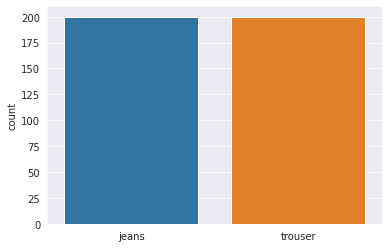

In [106]:
l = []
for i in train:
    if(i[1] == 1):
        l.append("trouser")
    elif(i[1]==0):
        l.append("jeans")
    else:
        l.append("sarees")
sns.set_style('darkgrid')
sns.countplot(l)

In [107]:
train.shape

(400, 2)

Text(0.5, 1.0, 'jeans')

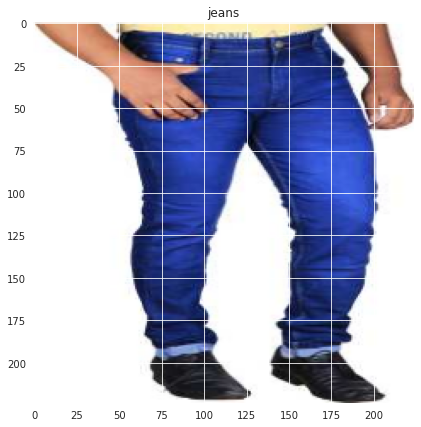

In [108]:
plt.figure(figsize = (7,7))
plt.imshow(train[1][0])
plt.title(labels[train[1][1]])

In [109]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'jeans')

In [110]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [111]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [112]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 64)       

In [113]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 150 , validation_data = (x_val, y_val))

Epoch 1/150
13/13 [==============================] - 12s 933ms/step - loss: 0.6905 - accuracy: 0.5025 - val_loss: 0.7086 - val_accuracy: 0.4737
Epoch 2/150
13/13 [==============================] - 12s 940ms/step - loss: 0.6835 - accuracy: 0.5250 - val_loss: 0.6992 - val_accuracy: 0.4737
Epoch 3/150
13/13 [==============================] - 12s 958ms/step - loss: 0.6758 - accuracy: 0.5550 - val_loss: 0.6954 - val_accuracy: 0.4737
Epoch 4/150
13/13 [==============================] - 12s 915ms/step - loss: 0.6685 - accuracy: 0.5825 - val_loss: 0.6889 - val_accuracy: 0.4737
Epoch 5/150
13/13 [==============================] - 12s 934ms/step - loss: 0.6617 - accuracy: 0.6725 - val_loss: 0.6841 - val_accuracy: 0.5263
Epoch 6/150
13/13 [==============================] - 12s 903ms/step - loss: 0.6545 - accuracy: 0.7425 - val_loss: 0.6805 - val_accuracy: 0.6316
Epoch 7/150
13/13 [==============================] - 13s 978ms/step - loss: 0.6497 - accuracy: 0.7625 - val_loss: 0.6773 - val_accuracy:

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['jeans (Class 0)','sarees (Class 1)']))

In [ ]:
# transferlearning

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

In [ ]:
base_model.trainable = False
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(2, activation="softmax")                                     
                                ])

In [ ]:
base_learning_rate = 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs = 150 , validation_data = (x_val, y_val))

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(150)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_val, predictions, target_names = ['Jeans  (Class 0)','SArees (Class 1)']))